# First NN example

## Import the data

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

## Build and train a model

In [9]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [13]:
train_images = train_images.reshape(((60000, 28*28)))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels =  to_categorical(test_labels)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2523 - acc: 0.9272
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1043 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0692 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0499 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0374 - acc: 0.9890


## Evaluate the model on the holdout set

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 28us/step


In [17]:
test_acc

0.9781

In [18]:
test_loss

0.07407088501430116

## Visualise a digit

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

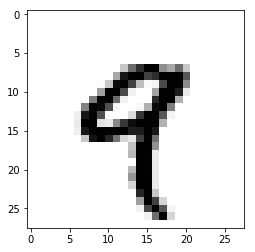

In [25]:
plt.imshow(train_images[4].reshape((28, 28)), cmap=plt.cm.binary)

## Broadcasting example

In [29]:
import numpy as np

In [30]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

In [31]:
z = np.maximum(x, y)

array([[[[0.56832035, 0.70025193, 0.61287425, ..., 0.61247224,
          0.44141871, 0.22940675],
         [0.55471362, 0.76273057, 0.05757617, ..., 0.88129679,
          0.80387605, 0.28754785],
         [0.2848414 , 0.95665289, 0.92870516, ..., 0.97558966,
          0.73899672, 0.39743777],
         ...,
         [0.14791513, 0.6252961 , 0.28041398, ..., 0.63581323,
          0.82560685, 0.89851848],
         [0.74695144, 0.91623842, 0.68639734, ..., 0.19918137,
          0.37054475, 0.60825338],
         [0.80949394, 0.80565191, 0.55849658, ..., 0.69214268,
          0.93413609, 0.93996431]],

        [[0.39676436, 0.70995579, 0.58147662, ..., 0.55527079,
          0.44141871, 0.67647029],
         [0.70418682, 0.76273057, 0.61019209, ..., 0.88129679,
          0.42012606, 0.5399893 ],
         [0.66793279, 0.06042209, 0.92870516, ..., 0.97558966,
          0.7788859 , 0.98297761],
         ...,
         [0.91853441, 0.55351946, 0.28041398, ..., 0.63581323,
          0.82560685, 0.9